## *Statistics coded:* Government Finance Statistics

Prepared by [**Bonamino Luca**](luca.bonamino@hotmail.com) (EMOS).

This notebook aims at illustrating the *Statistics Expplained* article on [government finance statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php/Government_finance_statistic).


## Settings required

### Built-il libraries

In [56]:
import requests
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prettytable import PrettyTable

### Costum libraries

In [53]:
costum_lib_locations = ['../src']
for location in costum_lib_locations:
    if location not in sys.path:
        sys.path.append('../src')
import requestLib
import dataDealer

### functions and variables needed in the notebook

In [36]:
def clean_country(country):
    for i in range(len(country)):
        if 'Germany' in country[i]:
            country[i] = 'Germany'
        elif 'Euro area - 19' in country[i]:
            country[i] = 'Euro Area (EA-19)'
        elif 'European Union' in country[i]:
            n = country[i].split(" ")[3]
            country[i] = 'EU-%s' % (n)
    return country

noCountry = ['European Union - 27 countries (2007-2013)' ,
             'European Union - 25 countries (2004-2006)',
             'Euro area - 18 countries (2014)',
             'Euro area - 17 countries (2011-2013)' 
            ]
host_url = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"

# Public Balance 2018 and 2019

[+] OK! Data recieved
	Succesful response


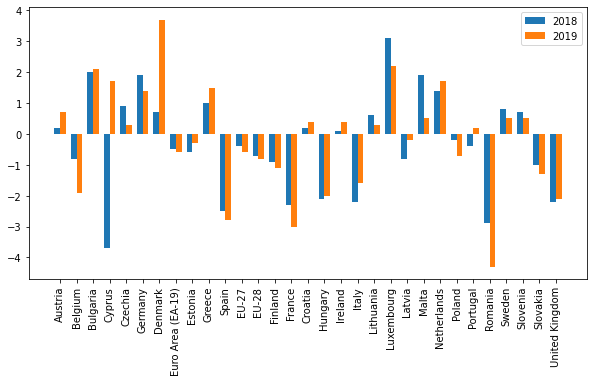

In [37]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

args = requestLib.args_to_dict('table= gov_10dd_edpt1', 'na_item=B9', 'precision=1', 'unit=PC_GDP', 'time=2018,2019','sector=S13')
client = requestLib.RequestHandeler(host_url)

data , strdata, response = client.get_request(args) 
times = list(list(data['dimension']['time']['category'].values())[1].values())

country = list(list(data['dimension']['geo']['category'].values())[1].values())

values = list(data['value'].values())

years, country = dataDealer.json_to_data(country, times, values, remove_lines=True, remove_list=noCountry)
country = clean_country(country)
pos = np.arange(len(country))

fig, ax = plt.subplots()
ax.set_xticks(pos)
ax.set_xticklabels(country, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(years['2018'].values()),  width, label='2018')
ax.bar(pos +  width/2., list(years['2019'].values()),  width, label='2019')
plt.legend(loc='upper right')

plt.show()

In [3]:
columns = country
lines = times

M = np.zeros((len(country), len(times)))
for i in range(len(country)):
    for j in range(len(times)):
        M[i][j] = years[times[j]][country[i]]
df = pd.DataFrame(M, index=country, columns=times)
D = dataDealer.subjason_to_DataFrame(country, times, years)
D.head()

,2018,2019
Austria,0.2,0.7
Belgium,-0.8,-1.9
Bulgaria,2.0,2.1
Cyprus,-3.7,1.7
Czechia,0.9,0.3



# Public Balance and General Governement Debt, 2016-2019

In [57]:
args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=B9', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2016,2017,2018,2019',
                    
                    'sector=S13')

data , strdata, response = client.get_request(args) 
times = list(list(data['dimension']['time']['category'].values())[1].values())

country = list(list(data['dimension']['geo']['category'].values())[1].values())

values = list(data['value'].values())

years, country = dataDealer.json_to_data(country, times, values, remove_lines=True, remove_list=noCountry)
balance = dataDealer.subjason_to_DataFrame(country, times, years)
country = clean_country(country)

args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=GD', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2016,2017,2018,2019',
                    'sector=S13')
data , strdata, response = client.get_request(args) 

country = list(list(data['dimension']['geo']['category'].values())[1].values())

values = list(data['value'].values())

noCountry = ['European Union - 27 countries (2007-2013)' ,
             'European Union - 25 countries (2004-2006)',
             'Euro area - 18 countries (2014)',
             'Euro area - 17 countries (2011-2013)' 
            ]
years, country = dataDealer.json_to_data(country, times, values, remove_lines=True, remove_list=noCountry)
debt = dataDealer.subjason_to_DataFrame(country, times, years)
country = clean_country(country)
result = pd.concat([balance, debt], axis=1, sort=False)
#print(result)
######
#### TO DO: print the full table

[+] OK! Data recieved
	Succesful response
[+] OK! Data recieved
	Succesful response


## General government debt, 2019 and 2018

[+] OK! Data recieved
	Succesful response


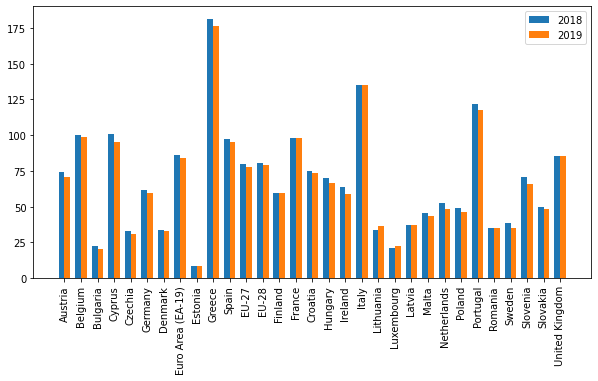

In [52]:
args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=GD', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2018,2019',
                    'sector=S13')


data , strdata, response = client.get_request(args) 
times = list(list(data['dimension']['time']['category'].values())[1].values())

country = list(list(data['dimension']['geo']['category'].values())[1].values())

values = list(data['value'].values())

years, country = dataDealer.json_to_data(country, times, values, remove_lines=True, remove_list=noCountry)
country = clean_country(country)
pos = np.arange(len(country))

fig, ax = plt.subplots()
ax.set_xticks(pos)
ax.set_xticklabels(country, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(years['2018'].values()),  width, label='2018')
ax.bar(pos +  width/2., list(years['2019'].values()),  width, label='2019')
plt.legend(loc='upper right')

plt.show()

### Restore import settings

In [58]:
# lanch as last commend to restore the previous python import settings
for location in costum_lib_locations:
    sys.path.remove(location)